# Health Insurance Cost Prediction

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("C:\\Users\\tanes\\Downloads\\insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Exploring Data & Analysing Data

In [6]:
df.shape

(1338, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Visualisation

C:\Users\tanes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

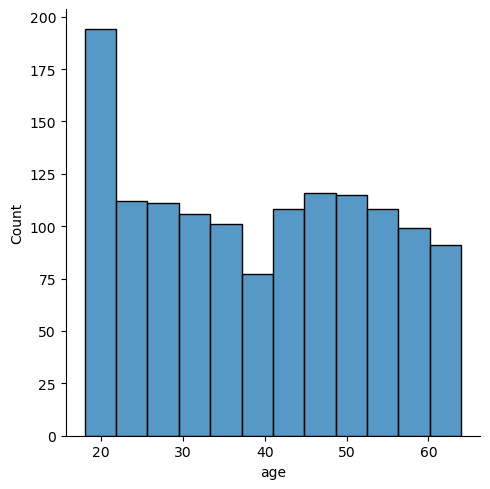

In [12]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='age')

C:\Users\tanes\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 300x300 with 0 Axes>

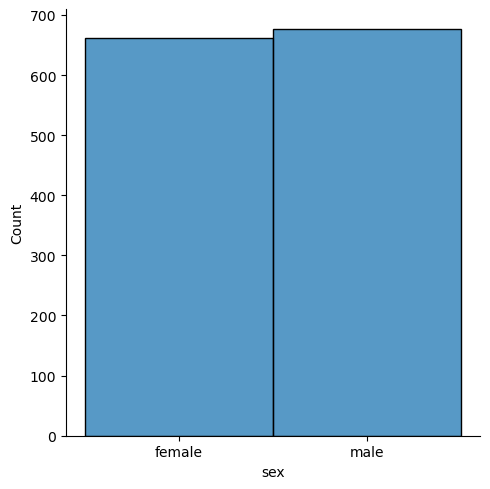

In [16]:
plt.figure(figsize=(3,3))
sns.displot(data=df,x='sex')


In [17]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

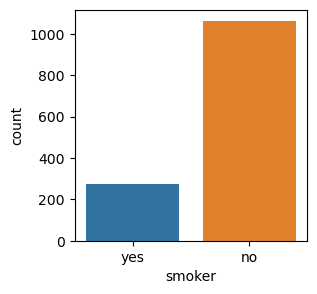

In [18]:
plt.figure(figsize=(3,3))
sns.countplot(data=df,x='smoker')
plt.show()

### convert categorical column to numerical

In [19]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


### Train Test Split

In [21]:
X = df.drop('charges',axis=1)
y = df['charges']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape

(1070, 6)

In [24]:
X_test.shape

(268, 6)

In [25]:
lg = LinearRegression()
lg.fit(X_train,y_train) # 80 model will be train
y_pred = lg.predict(X_test)#20 model will be predicted

In [26]:
r2_score(y_test,y_pred)

0.7839279776463969

In [27]:
df1=pd.DataFrame({'actual':y_test,'lg':y_pred})
df1

,actual,lg
764,9095.06825,8856.651536
887,5272.17580,7101.882358
890,29330.98315,36893.618988
1293,9301.89355,9470.364241
259,33750.29180,27035.848445
...,...,...
109,47055.53210,38918.765285
575,12222.89830,11780.420912
535,6067.12675,7584.912388
543,63770.42801,40806.644525


### prediction for new customer

In [33]:
data1={'age':30,
       'sex':0,
        'bmi':44.30,
        'children':3,
         'smoker':0,
         'region':1}

In [34]:
df2=pd.DataFrame(data1,index=[0])
df2

,age,sex,bmi,children,smoker,region
0,30,0,44.3,3,0,1


In [35]:
pred=lg.predict(df2)
print("cost for new customer is:",pred[0])

cost for new customer is: 11416.955293177221
